<a href="https://colab.research.google.com/github/JuanM-GG/sistemas-dinamicos-R/blob/main/balance_reactor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Título: Balance de materia en reactor

Nombre: Juan Manuel G.G

Fecha: 11 de diciembre

Cargar librerías


In [1]:
install.packages("deSolve")
install.packages("FME")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘rootSolve’, ‘coda’, ‘minpack.lm’, ‘minqa’




In [32]:
source("Grind.R")

grind.R was sourced


# Balance de materia

### Balance de masa 

Consideramos un reactor en el cuál se presenta un flujo de masa en la entrada y en la salidad. La densidad en el biorreactor permanece constante, es decir, la densidad es la misma en la entrada y en la salida. Se tiene entonces.

$$\frac{dm}{dt} = q_{e} \rho - q_{s} \rho$$

$$\frac{dm}{dt} = \rho (q_{e} - q_{s} )$$

$\rho$ es la densidad, $q_{e}$ es el caudal en la entrada y $q_{s}$ es el caudal en la salida 

Considerando que $m = \rho V$

$$ \frac{d(\rho V)}{dt} = \rho * (q_{e} - q_{s})$$

$$ \rho\frac{dV}{dt} + V\frac{d \rho}{dt}= \rho * (q_{e} - q_{s})$$


$$ \frac{dV}{dt}= q_{e} - q_{s}$$

### Balance por especie 

Considerando una especie A, la cual está presente en los flujos de entrada y de salida. Además, participa en reacciones de generación y consumo. El balance general para esta especie es.

$$\frac{dm_{A}}{dt} = q_{e} c_{Ae} - q_{s} c_{A} + r_{g} V - r_{c} V$$

Considerando que $m_{A} = c_{A} V$

$$\frac{d(c_{A} V)}{dt} = q_{e} c_{Ae} - q_{s} c_{A} + r_{g} V - r_{c} V$$

$$c_{A}\frac{dV}{dt} + V\frac{dc_{A}}{dt} = q_{e} c_{Ae} - q_{s} c_{A} + r_{g} V - r_{c} V$$

$$ \frac{dc_{A}}{dt} = \frac{q_{e}}{V} c_{Ae} - \frac{q_{s}}{V} c_{A} + r_{g}  - r_{c}  - \frac{(q_{e} - q_{s})}{V}c_{A}$$

$$ \frac{dc_{A}}{dt} = \frac{q_{e}}{V}(c_{Ae} - c_{A})+ r_{g}  - r_{c} $$

Ahora consideramos un reactor en el que se encuentran dos especies $A$ y $B$. Donde $A$ se transforma en $B$ mediante una reacción simple. 

$$A + B \rightarrow B$$

La especie A es alimentada al reactor a una concentración $c_{Ain}$, mientras que la especie $B$ es producida en el reactor. Considerando que la velocidad a la que ocurre la reacción es $r = k c_{A}c_{B}$, y que los flujos en la entrada y en la salida son respectivamente $q_{e}$ y $q_{s}$, se tiene el siguiente modelo para describir el proceso

$$\frac{dc_{A}}{dt} = \frac{q_{e}}{V} (c_{Ain} - c_{A}) - kc_{A}c_{B}$$

$$\frac{dc_{B}}{dt} = - \frac{q_{e}}{V}c_{B} + kc_{A}c_{B}$$


$$\frac{dV}{dt} = q_{e} - q_{s}$$

Vamos a divertirnos :D

# Establecer modelo 

In [3]:
model <- function(time, state, parms) {
  with(as.list(c(state, parms)), {

    dca <- qe/V*(cain - ca) - k*ca*cb
    dcb <- - qe/V*cb + k*ca*cb 
    dV <- qe - qs

    return(list(c(dca, dcb, dV)))
  })
}

Establecer valores de parámetros 

In [4]:
p <- c(qe = 1, qs = 1, cain = 10, k = 0.1)

Establecer condiciones iniciales

In [5]:
s <- c(ca = 5, cb = 0.5, V = 10)

Intervalo de la simulación 

In [6]:
times <- seq(0,50,1)

Resolver sistema 

In [7]:
out <- ode(y = s, parms = p, times = times, func = model, method = "rk4")

Mostrar resultados 

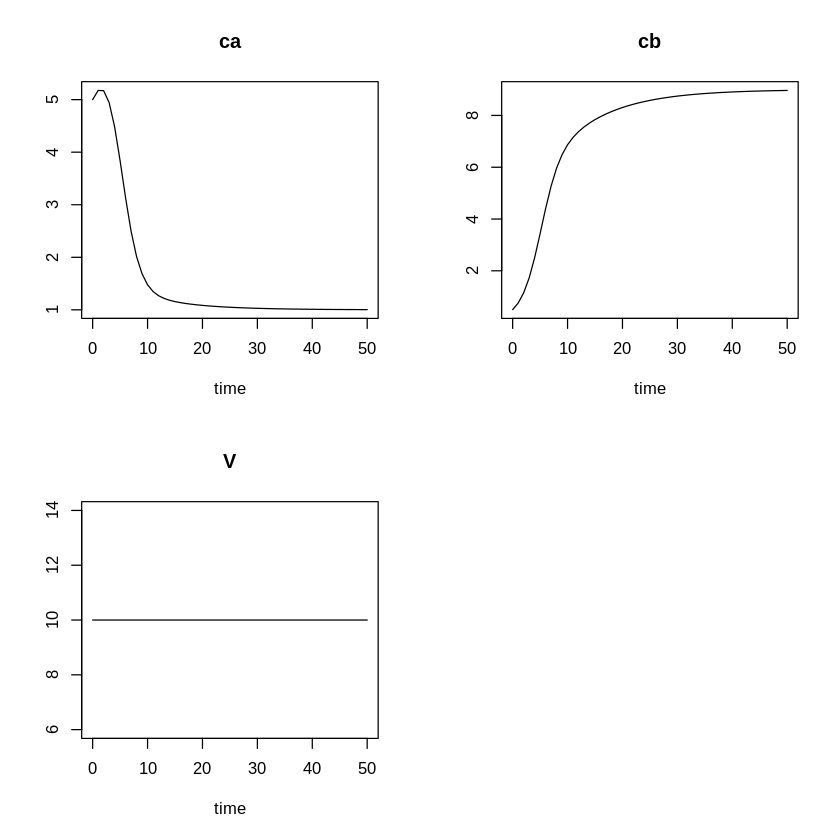

In [33]:
plot(out)

# Análisis de estabilidad

A partir de las ceroclinas es posible obtener los puntos de equilibrio. Empezamos por considerar el caso en el que $q_{e} = q_{s}$, y por lo tanto $\frac{dV}{dt} = 0$. Además, $D = \frac{q_{e}}{V}$.

$$\frac{dc_{A}}{dt} = D (c_{Ae} - c_{A}) - kc_{A}c_{B}$$

$$\frac{dc_{B}}{dt} = - Dc_{B} + kc_{A}c_{B}$$

$$ \frac{dc_{B}}{dt} = 0 \hspace{1cm} \rightarrow \hspace{1cm} \bar{c}_{B} = 0, \hspace{1cm} \bar{c}_{A} = \frac{D}{k} $$

$$ \frac{dc_{A}}{dt} = 0 \hspace{1cm} \rightarrow \hspace{1cm} c_{B} = D \left( \frac{c_{Ae} - c_{A}}{kc_{A}} \right) \hspace{1cm} \rightarrow \hspace{1cm}  \bar{c}_{B} = c_{Ae} - \frac{D}{k} $$

Vemos que existen dos punto de equilibrio ($c_{Ass} = \frac{D}{k}, c_{Bss} = c_{Ae} - \frac{D}{k}$) y ($c_{Ass} = c_{Ae}, c_{Bss} = 0$). A continuación analizamos su estabilidad.

In [9]:
model <- function(time, state, parms) {
  with(as.list(c(state, parms)), {

    dca <- D*(cain - ca) - k*ca*cb 
    dcb <- -D*cb + k*ca*cb 

    return(list(c(dca, dcb)))
  })
}

ca       cb 
1.000051 8.999540

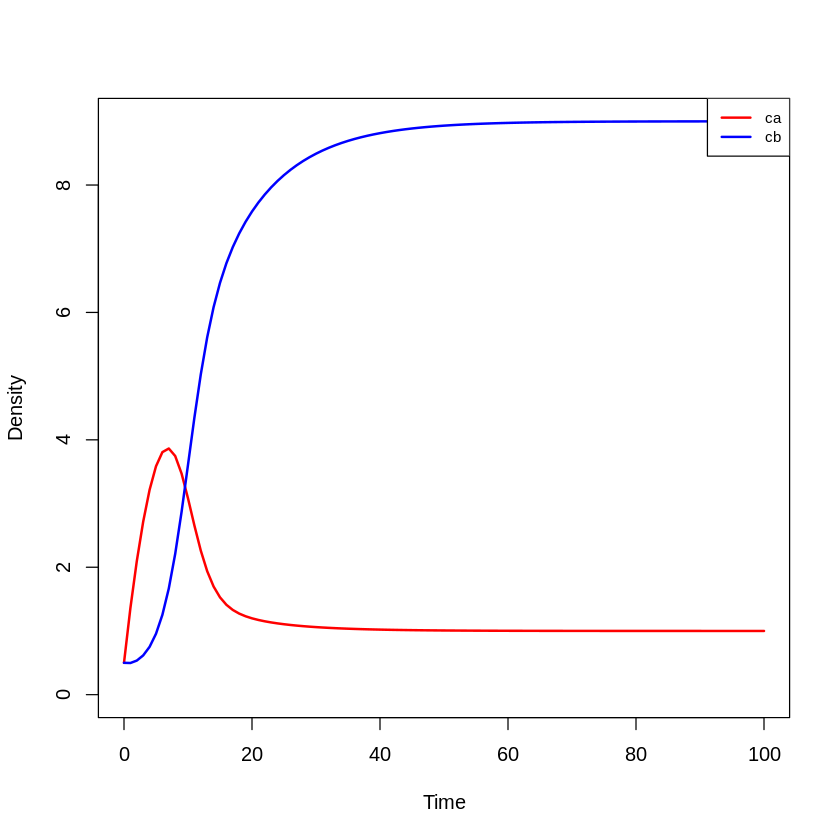

In [10]:
p <- c(D = 0.1, cain = 10, k = 0.1)
s <- c(ca = 0.5, cb = 0.5)
run(tmax = 100)

## Plano de fase

ca cb 
 1  9 
Stable point, eigenvalues:  -0.9 -0.1 


ca cb 
 1  9

ca cb 
10  0 
Unstable point, eigenvalues:  0.9 -0.1 


ca cb 
10  0

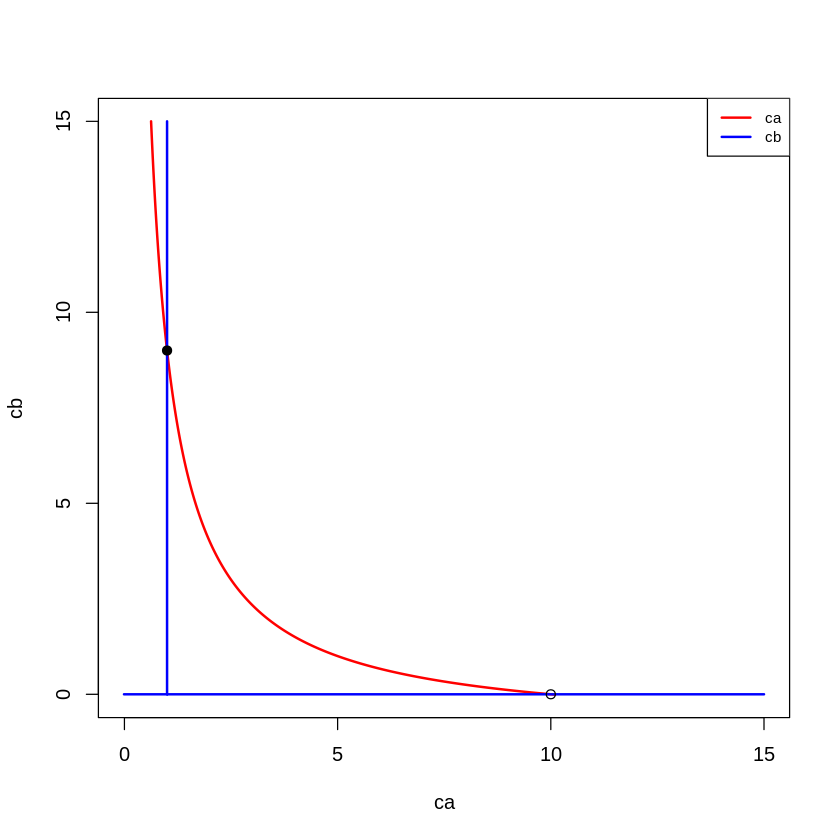

In [11]:
plane(xmax = 15, ymax = 15, xmin = -0.01, ymin = -0.01)
newton(state = c(ca = 1, cb = 10), plot = TRUE)
newton(state = c(ca = 10, cb = 0), plot = TRUE)

De acuerdo con los eigenvalores, el punto de equilibrio ($c_{Ass} = \frac{D}{k}, c_{Bss} = c_{Ae} - \frac{D}{k}$) es estable, mientras que el punto ($c_{Ass} = c_{Ain}, c_{Bss} = 0$) es inestable.

ca cb 
 1  9 
Stable point, eigenvalues:  -0.9 -0.1 


ca cb 
 1  9

ca       cb 
1.000051 8.999540

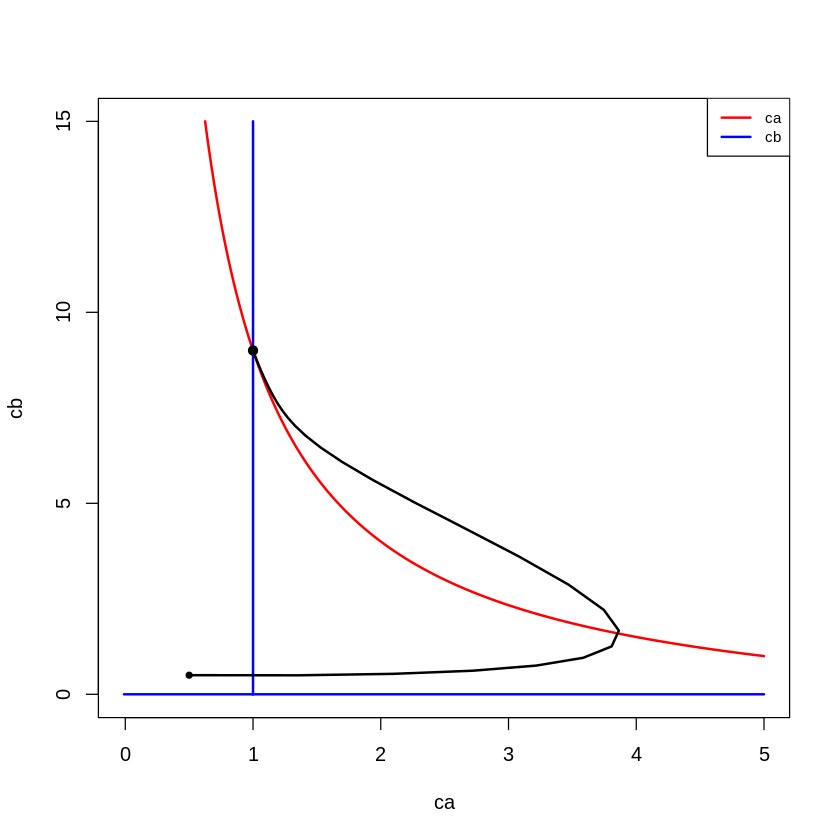

In [12]:
plane(xmax = 5, ymax = 15, xmin = -0.01, ymin = -0.01)
newton(state = c(ca = 1, cb = 10), plot = T)
run(traject = TRUE)

## Efecto del parámetro D

Ahora podríamos preguntarnos cómo afecta el valor del parámetro $D$ la estabilidad de estos puntos de equilibrio. Esta pregunta es importante porque en un reactor químico, este parámetro se puede modificar con el objetivo de incrementar o disminuir las concentraciones de reactivos y productos. 

ca cb 
 1  9 
Stable point, eigenvalues:  -0.9 -0.1 
ca cb 
10  0 
Unstable point, eigenvalues:  0.9 -0.1 


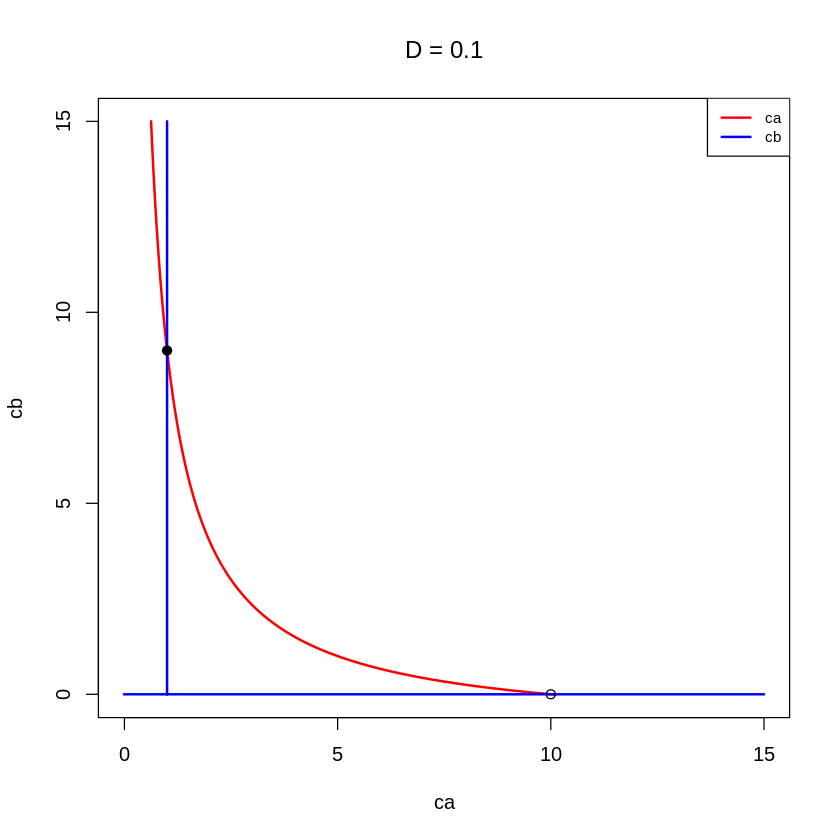

ca cb 
 5  5 
Stable point, eigenvalues:  -0.5000042 -0.4999958 
ca cb 
10  0 
Unstable point, eigenvalues:  0.5 -0.5 


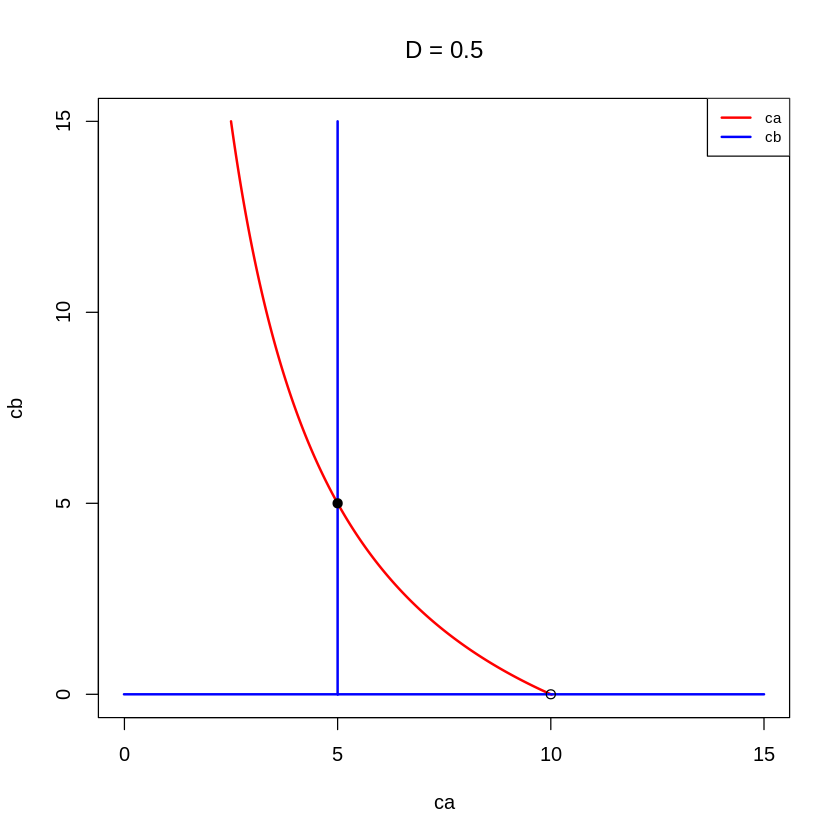

          ca           cb 
9.9997108861 0.0002891139 
Stable point, eigenvalues:  -1 -5.782278e-05 
ca cb 
10  0 
Unstable point, eigenvalues:  -1 0 


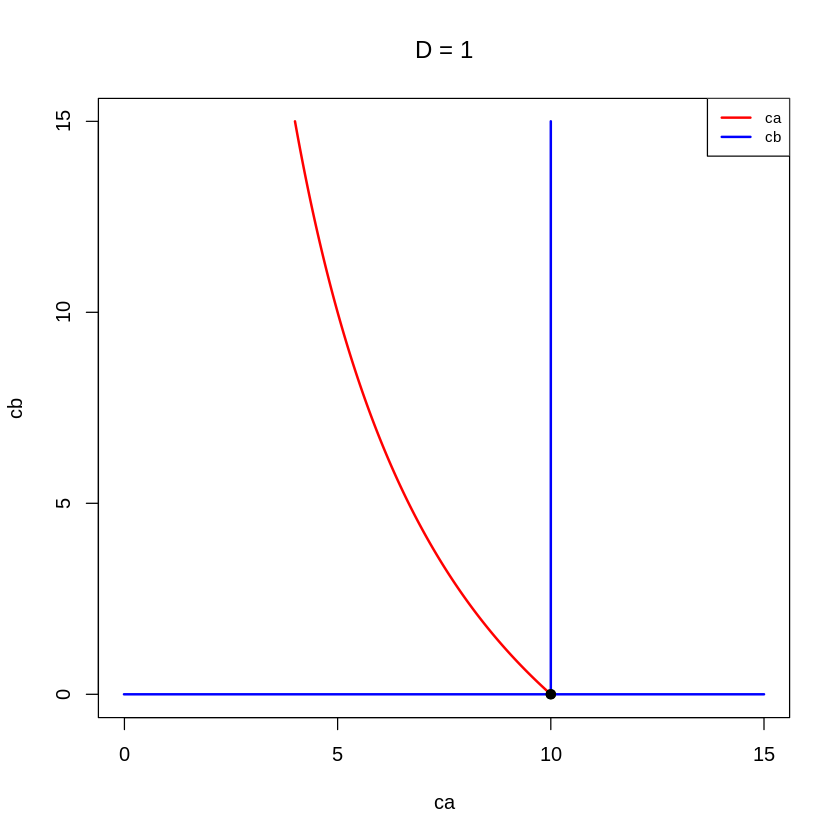

ca cb 
10  0 
Stable point, eigenvalues:  -1.5 -0.5 
ca cb 
10  0 
Stable point, eigenvalues:  -1.5 -0.5 


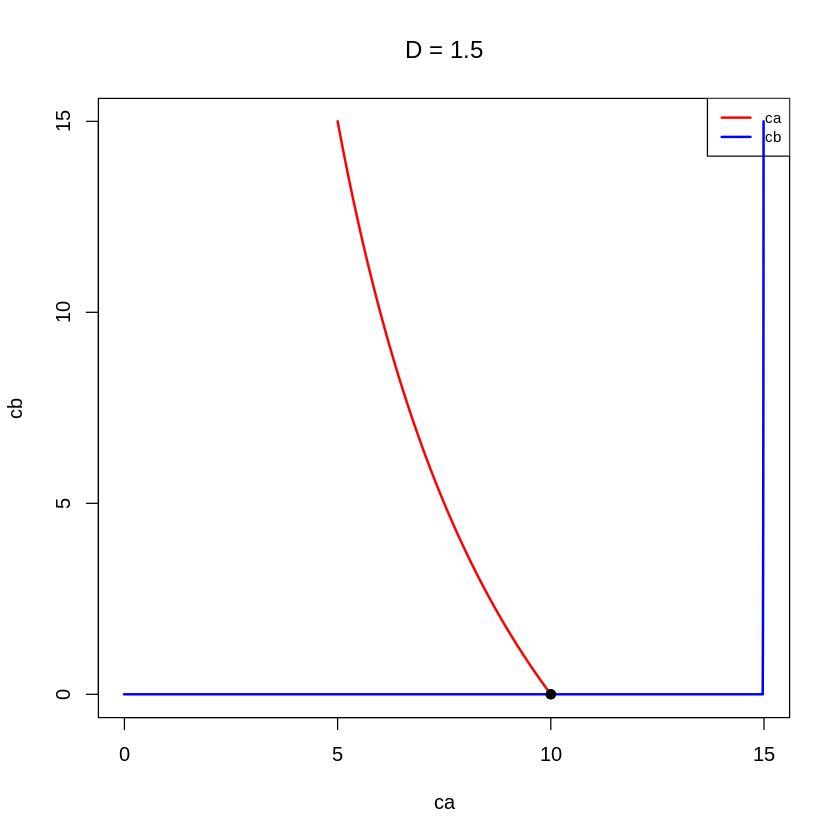

In [13]:
for(D in c(0.1, 0.5, 1, 1.5)) {

  p["D"] <- D
  plane(xmax = 15, ymax = 15, xmin = -0.01, ymin = -0.01, main = paste0("D = ", D))
  newton(state = c(ca = 1, cb = 10), plot = TRUE)
  newton(state = c(ca = 10, cb = 0), plot = TRUE)
}
p["D"] <- 0.1 # regresar al valor inicial 

Vemos algo interesante, al incrementar el valor del parámetro $D$, de 0.1 hasta 1, vamos cambiando el valor del punto de equilibrio, pero su estabilidad no se modifica. Al llegar al valor $D = 1$, de repente, pasamos a tener un solo punto de equilibrio ($c_{Ass} = c_{Aen}, c_{Bss} = 0$) el cual pasa a ser estable. Si continuamos incrementando el valor del parámetro $D$, ya no modificamos la estabilidad del punto de equilibrio ni tampoco su valor, este permanece igual sin importar cuando crezca $D$. 

La interpretación química de los que ha ocurrido es que, una vez que se llega al valor $D = 1$, la cantidad se reactivo $A$ que se está alimentando, $c_{Ae}$, se vuelve insuficiente para mantener una concentración estable del reactivo $B$ en el reactor. Del plano de fase podemos ver que una condición necesaria para mantener una cantidad estable del reactivo $B$ en el reactor es,

$$ \frac{D}{k} < c_{Ae}$$

Por lo tanto, la cantidad $\frac{D}{k}$ representa la concentración mínima del reactivo $A$ que hay que alimentar al bioreactor para mantener una concentración estable del reactivo $B$ en el reactor. 

El análisis anterior se puede resumir en una diagrama de bifurcación.

## Diagrama de bifurcación 

### ¿Cómo depende el valor de $c_{Bss}$ del valor del parámetro $D$?

ca cb 
 1  9 
Stable point, eigenvalues:  -0.9 -0.1 
ca cb 
10  0 
Unstable point, eigenvalues:  0.9 -0.1 
Starting at D = 0.1 with:
ca cb 
 1  9 
diagonal element is zero 
[1] 2
diagonal element is zero 
[1] 2
diagonal element is zero 
[1] 2
diagonal element is zero 
[1] 2
diagonal element is zero 
[1] 2
diagonal element is zero 
[1] 2
diagonal element is zero 
[1] 2
diagonal element is zero 
[1] 2
Final point at D = 1.5625e-05 
If this looks wrong try changing the step size
Starting at D = 0.1 with:
ca cb 
10  0 
Bifurcation at D = 1 


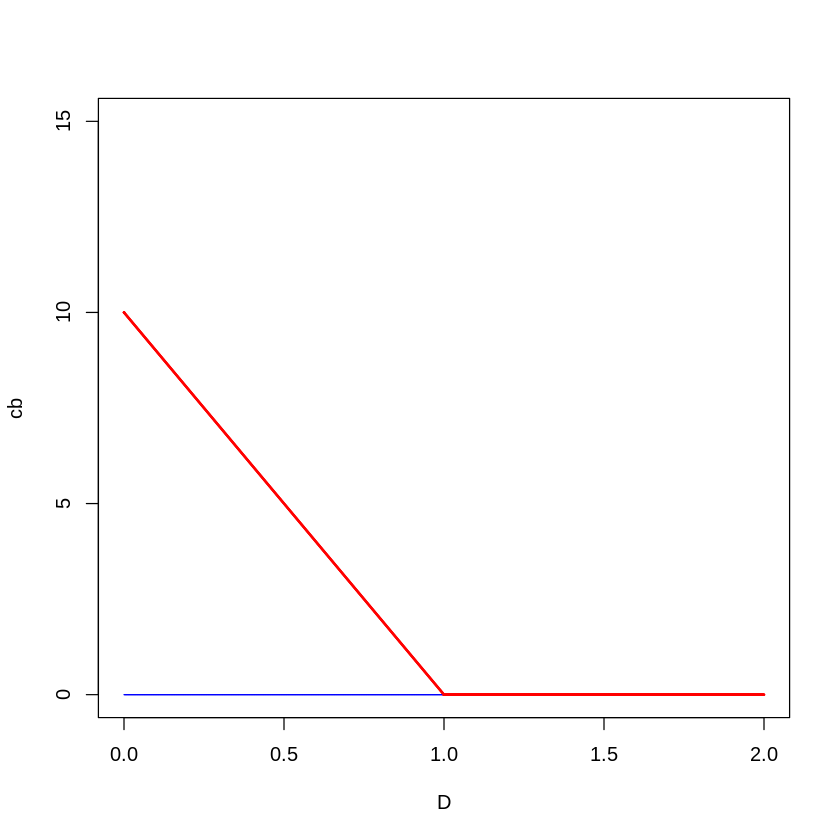

In [14]:
ss1 <- newton(state = c(ca = 1, cb = 10))
ss2 <- newton(state = c(ca = 10, cb = 0))
continue(state=ss1, parms=p, odes=model, x="D", step=0.001, xmin=0, xmax=2,y="cb", ymin=0, ymax=15)
continue(state=ss2, parms=p, odes=model, x="D", step=0.001, xmin=0, xmax=2,y="cb", ymin=-1, ymax=15, add = T)

Ya sabíamos esto a partir de la ceroclina de $c_{A}$

$$c_{Bss} = c_{Ae} - \frac{D}{k}$$

Como observamos antes, mientras se cumple la desigualdad $\frac{D}{k} < c_{Ae}$, existe un punto de equilibrio estable para el reactivo $B$ distinto de cero. Una vez que el valor de $D$ supera este valor límite, el punto de quilibrio $c_{Bss} = 0$ se vuelve estable. 

### ¿Cómo depende el valor de $c_{Ass}$ del valor del parámetros $D$?

ca cb 
 1  9 
Stable point, eigenvalues:  -0.9 -0.1 
ca cb 
10  0 
Unstable point, eigenvalues:  0.9 -0.1 
Starting at D = 0.1 with:
ca cb 
 1  9 
diagonal element is zero 
[1] 2
diagonal element is zero 
[1] 2
diagonal element is zero 
[1] 2
diagonal element is zero 
[1] 2
diagonal element is zero 
[1] 2
diagonal element is zero 
[1] 2
diagonal element is zero 
[1] 2
diagonal element is zero 
[1] 2
Final point at D = 1.5625e-05 
If this looks wrong try changing the step size
Starting at D = 0.1 with:
ca cb 
10  0 
Bifurcation at D = 1 


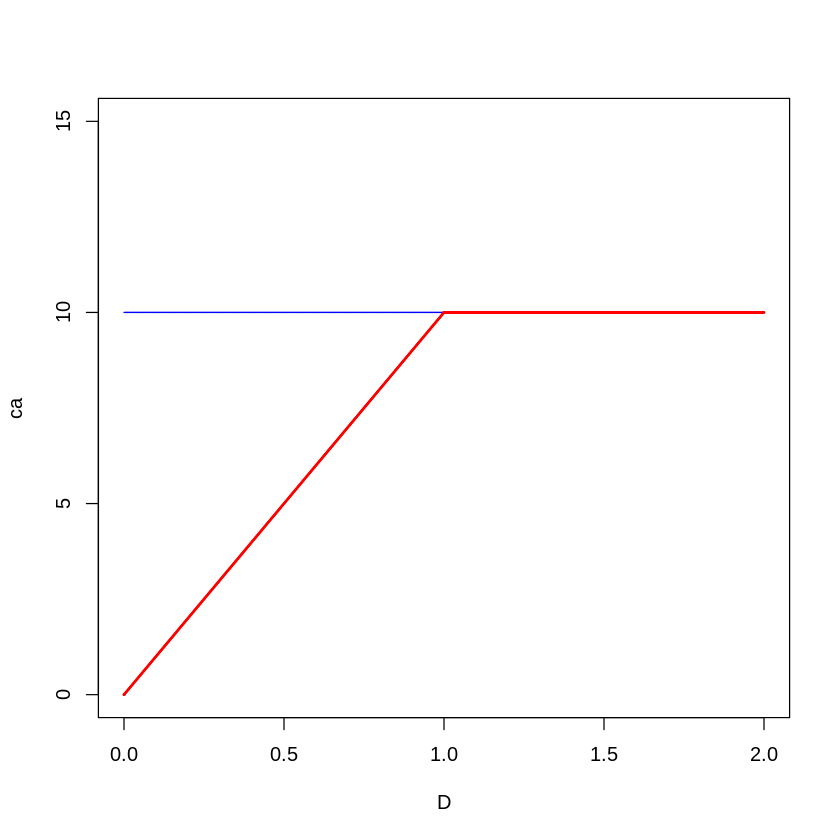

In [15]:
ss1 <- newton(state = c(ca = 1, cb = 10))
ss2 <- newton(state = c(ca = 10, cb = 0))
continue(state=ss1, parms=p, odes=model, x="D", step=0.001, xmin=0, xmax=2,y="ca", ymin=0, ymax=15)
continue(state=ss2, parms=p, odes=model, x="D", step=0.001, xmin=0, xmax=2,y="ca", ymin=-1, ymax=15, add = T)

En resumen se tiene lo siguiente.



1.   Cuando $\frac{D}{k} < c_{Ae}$ se tienen dos puntos de equilibrio. El punto de equilibrio estable $(c_{Ass} = \frac{D}{k}, c_{Bss} = c_{Ae} - \frac{D}{k})$, y el punto de equilibrio inestable $(c_{Ass} = c_{Ae}, c_{Bss} = 0)$

2.   Cuando $\frac{D}{k} = c_{Ae}$ se tiene solo un punto de equilibrio $(c_{Ass} = \frac{D}{k}, c_{Bss} = 0)$, el cual es estable

3.   Cuando $\frac{D}{k} > c_{Ae}$ existen un solo punto de equilibrio. El punto de equilibrio estable $(c_{Ass} = c_{Ae}, c_{Bss} = 0)$. Aunque en principio es posible encontrar un segundo punto de equilibrio $(c_{Ass} = \frac{D}{k}, c_{Bss} = c_{Ae} - \frac{D}{k})$, este tiene un valor negativo $c_{Bss}$, y por lo tanto no lo consideramos aquí. 



## Efecto del parámetro $c_{Ae}$.

        ca         cb 
 1.0000000 -0.5000001 
Unstable point, eigenvalues:  -0.1 0.05000001 
       ca        cb 
0.4999999 0.0000000 
Stable point, eigenvalues:  -0.1 -0.05000001 


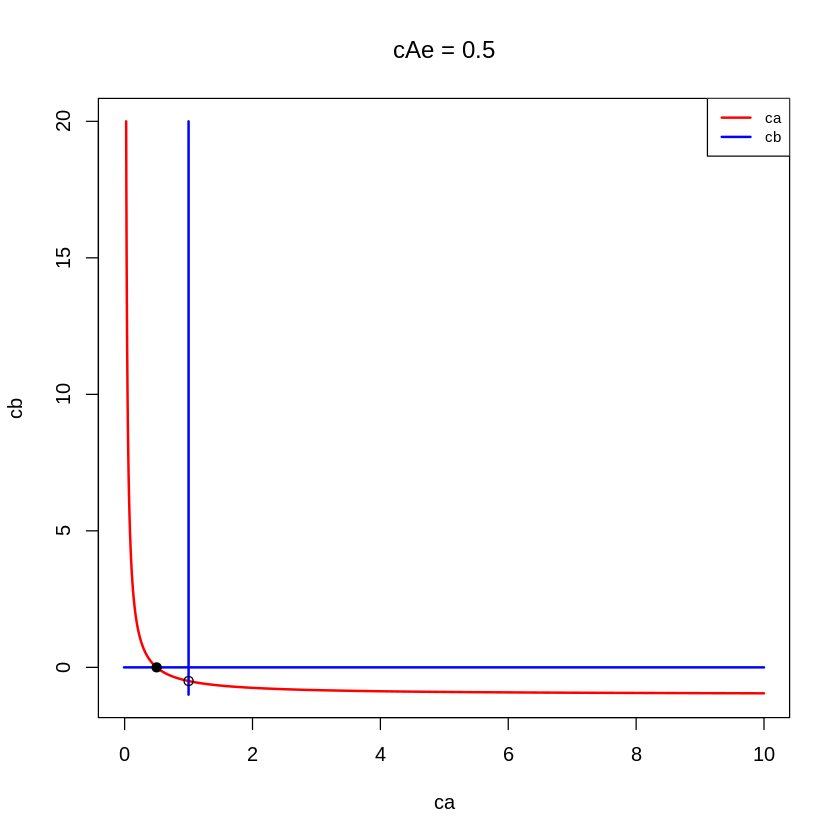

           ca            cb 
 1.000000e+00 -6.077471e-08 
Unstable point, eigenvalues:  -0.1 6.077471e-09 
       ca        cb 
0.9999999 0.0000000 
Stable point, eigenvalues:  -0.1 -5.469724e-09 


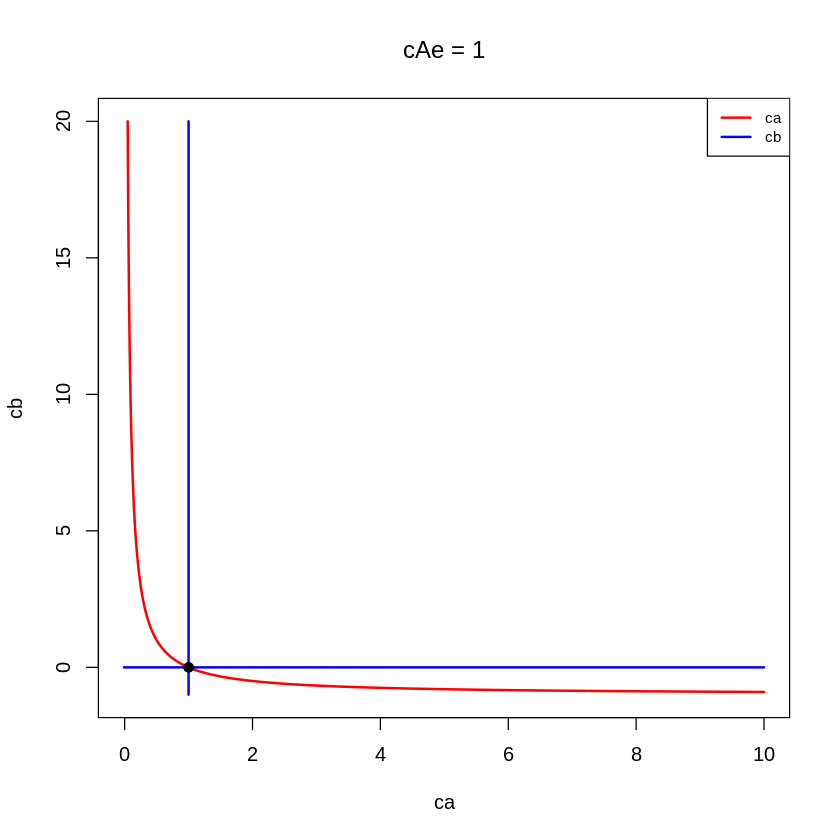

ca cb 
 1  4 
Stable point, eigenvalues:  -0.4 -0.1 
ca cb 
 5  0 
Unstable point, eigenvalues:  0.4 -0.1 


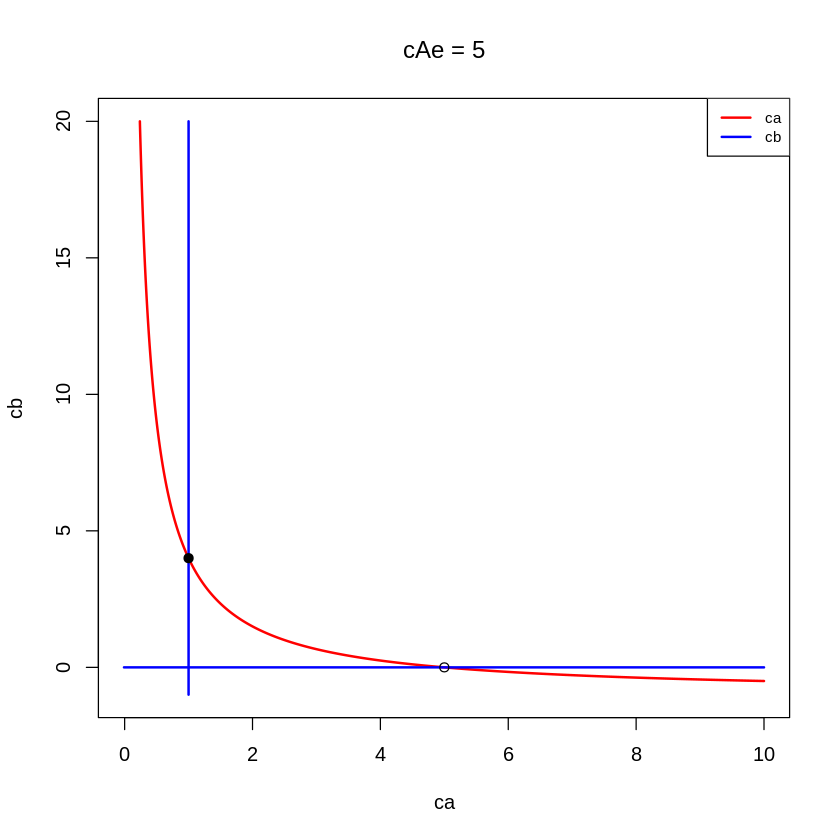

ca cb 
 1  9 
Stable point, eigenvalues:  -0.9 -0.1 
ca cb 
10  0 
Unstable point, eigenvalues:  0.9 -0.1 


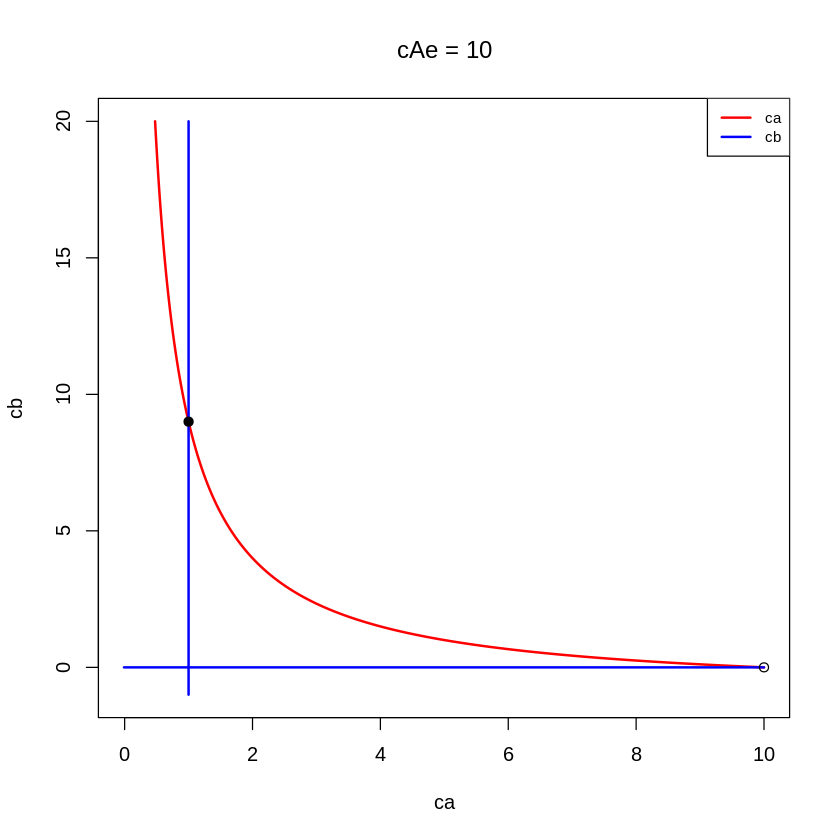

ca cb 
 1 14 
Stable point, eigenvalues:  -1.4 -0.1 
ca cb 
15  0 
Unstable point, eigenvalues:  1.4 -0.1 


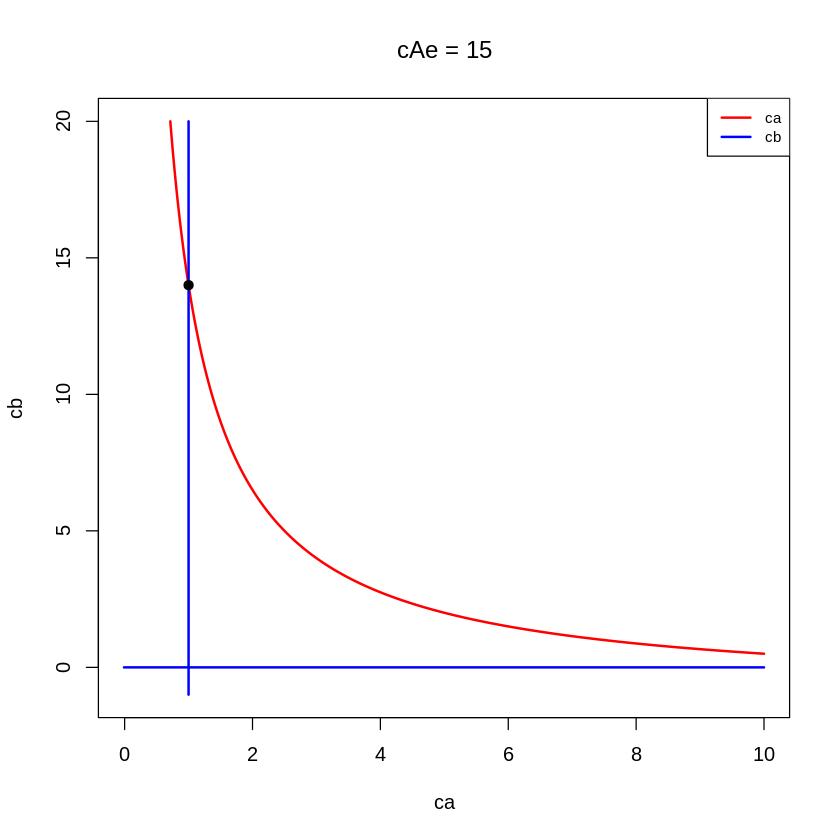

In [23]:
for(cain in c(0.5,1,5,10, 15)) {

  p["cain"] <- cain
  plane(xmax = 10, ymax = 20, xmin = -0.01, ymin = -1, main = paste0("cAe = ", cain))
  newton(state = c(ca = 1, cb = 10), plot = TRUE)
  newton(state = c(ca = 10, cb = 0), plot = TRUE)
}
p["cain"] <- 10 # regresar al valor inicial 

## Diagrama de bifurcación 

###¿Cómo depende el valor de $c_{Bss}$ del valor del parámetro $c_{Ae}$?

        ca         cb 
 1.0000000 -0.9000001 
Unstable point, eigenvalues:  -0.1 0.09000001 
        ca         cb 
0.09999994 0.00000000 
Stable point, eigenvalues:  -0.1 -0.09000001 
Starting at cain = 0.1 with:
        ca         cb 
 1.0000000 -0.9000001 
Bifurcation at cain = 1 
Final point at cain = 0.00028125 
If this looks wrong try changing the step size
Starting at cain = 0.1 with:
        ca         cb 
0.09999994 0.00000000 
Bifurcation at cain = 1.004 
Final point at cain = 0.00028125 
If this looks wrong try changing the step size


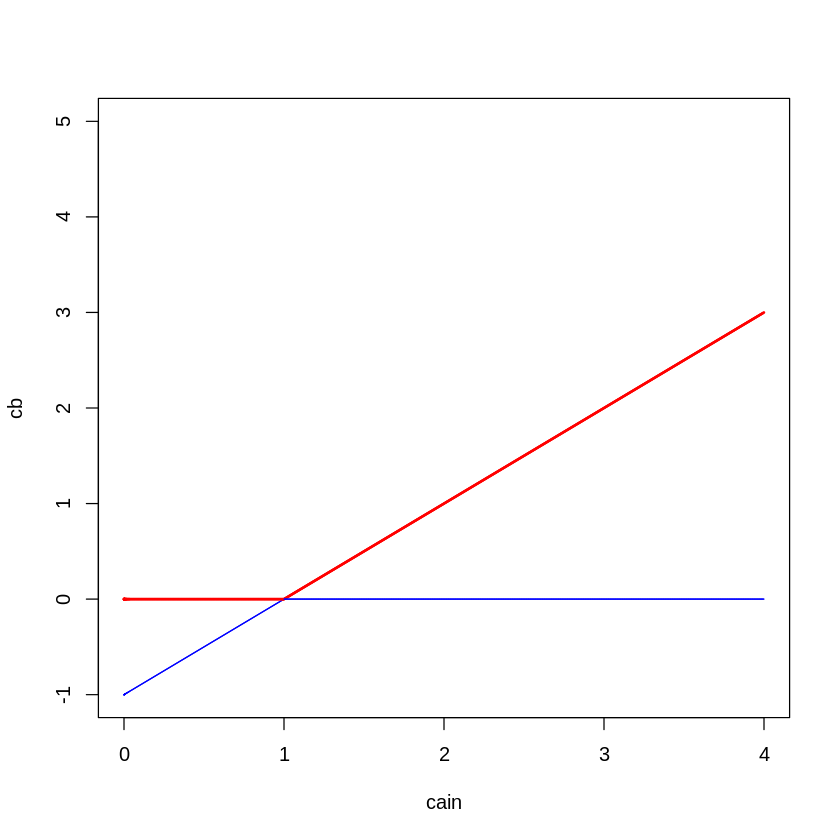

In [29]:
p["cain"] <- 0.1
ss1 <- newton(state = c(ca = 1, cb = 10))
ss2 <- newton(state = c(ca = 10, cb = 0))
continue(state=ss1, parms=p, odes=model, x="cain", step=0.001, xmin=0, xmax=4,y="cb", ymin=-1, ymax=5)
continue(state=ss2, parms=p, odes=model, x="cain", step=0.001, xmin=0, xmax=4,y="cb", ymin=-1, ymax=5, add = T)
p["cain"] <- 10 # regresar a su valor original 

###¿Cómo depende el valor de $c_{Ass}$ del valor del parámetro $c_{Ae}$?

        ca         cb 
 1.0000000 -0.9000001 
Unstable point, eigenvalues:  -0.1 0.09000001 
        ca         cb 
0.09999994 0.00000000 
Stable point, eigenvalues:  -0.1 -0.09000001 
Starting at cain = 0.1 with:
        ca         cb 
 1.0000000 -0.9000001 
Bifurcation at cain = 1 
Final point at cain = 0.00028125 
If this looks wrong try changing the step size
Starting at cain = 0.1 with:
        ca         cb 
0.09999994 0.00000000 
Bifurcation at cain = 1.004 
Final point at cain = 0.00028125 
If this looks wrong try changing the step size


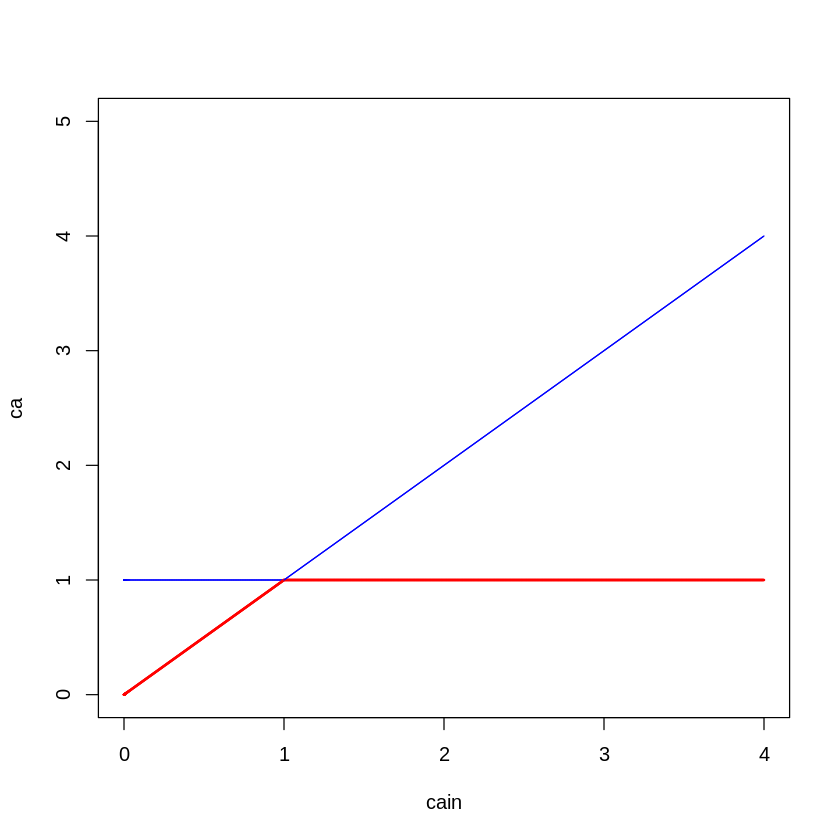

In [31]:
p["cain"] <- 0.1
ss1 <- newton(state = c(ca = 1, cb = 10))
ss2 <- newton(state = c(ca = 10, cb = 0))
continue(state=ss1, parms=p, odes=model, x="cain", step=0.001, xmin=0, xmax=4,y="ca", ymin=0, ymax=5)
continue(state=ss2, parms=p, odes=model, x="cain", step=0.001, xmin=0, xmax=4,y="ca", ymin=0, ymax=5, add = T)
p["cain"] <- 10 # regresar a su valor original 

Resumiendo, se observa lo siguiente con respecto al efecto del parámetro $c_{Ae}$ sobre la estabilidad.



1.   Cuando $c_{Ae} < \frac{D}{k}$ se tienen dos puntos de equilibrio. El punto de quilibrio estable $(c_{Ass} = c_{Ae}, c_{Bss} = 0)$, y el punto de quilibrio inestable $(c_{Ass} = \frac{D}{k}, c_{Bss} = c_{Ae} - \frac{D}{k})$. Sin embargo, el punto de equilibrio inestable contien un valor negativo $c_{Bss}$, y podría no considerarse.  

2.   Cuando $c_{Ae} = \frac{D}{k}$ ocurre una bifurcación, i.e., se pasa de tener dos punto de equilibrio a un solo punto de equilibrio $(c_{Ass} = \frac{D}{k}, c_{Bss} = 0)$, el cuál es estable. 

3.   Cuando $c_{Ae} > \frac{D}{k}$ existen 2 puntos de equilibrio. Uno estable $(c_{Ass} = \frac{D}{k}, c_{Bss} = c_{Ae} - \frac{D}{k})$, y uno inestable $(c_{Ass} = c_{Ae}, c_{Bss} = 0)$




De lo anterior concluimos que el valor de la razón $\frac{D}{k}$ determina el valor mímimo de concentración de reactivo $A$ en la alimentación, necesaria para que exista una concentración estable del reactivo $B$ en el reactor. 

## Efecto del parámetro $k$.

ca cb 
10  0 
Stable point, eigenvalues:  -0.1 -0.05 
ca cb 
10  0 
Stable point, eigenvalues:  -0.1 -0.05 


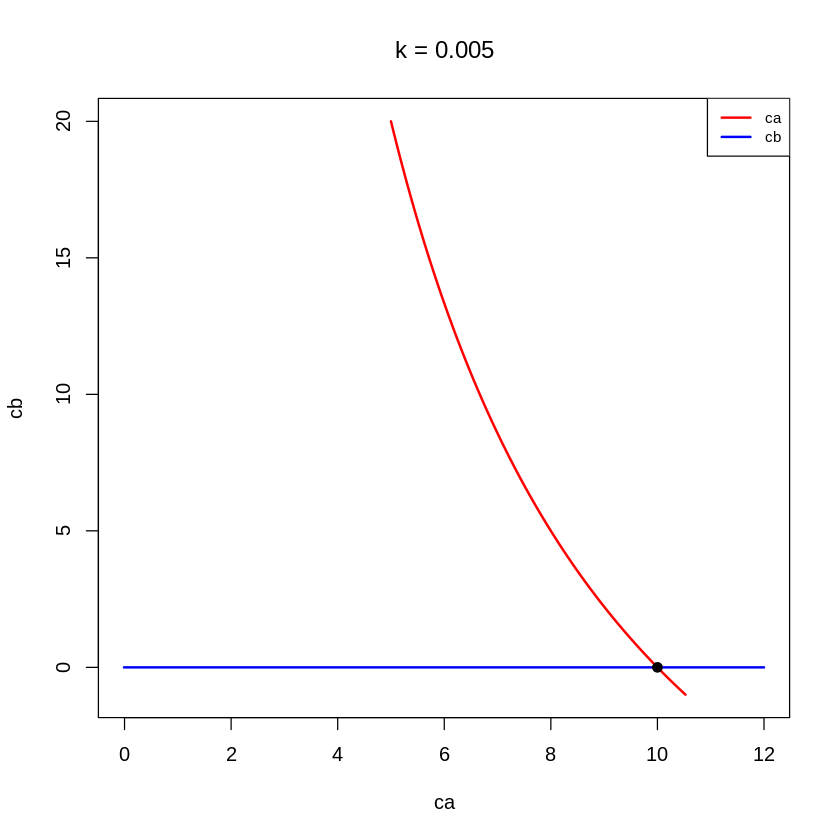

          ca           cb 
9.9994217723 0.0005782277 
Stable point, eigenvalues:  -0.1 -1.156455e-05 
ca cb 
10  0 
Unstable point, eigenvalues:  -0.1 0 


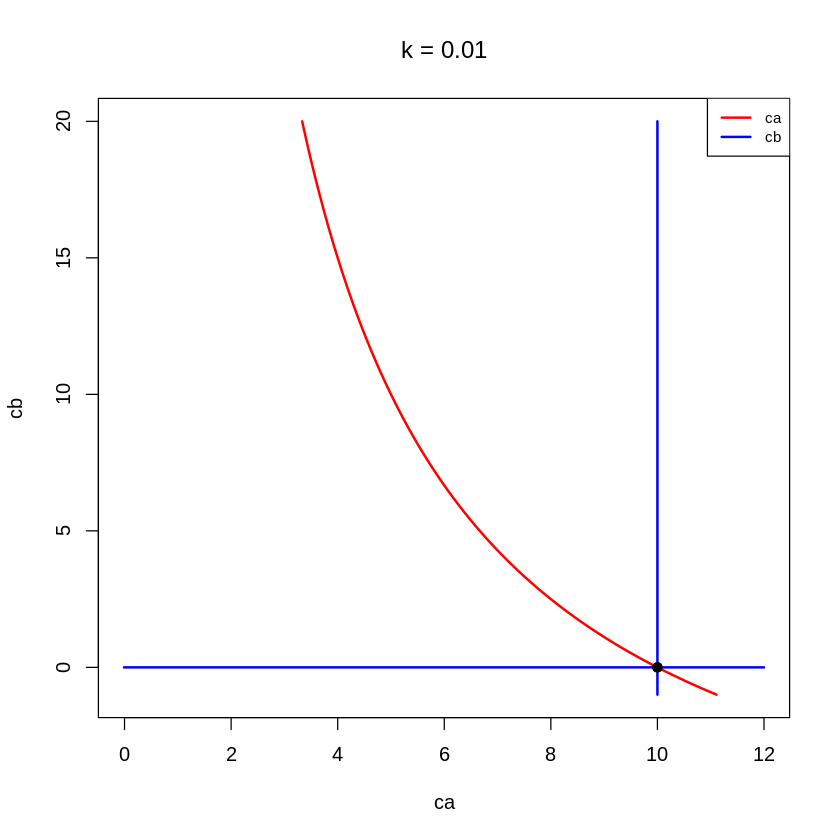

      ca       cb 
1.999998 8.000002 
Stable point, eigenvalues:  -0.4000002 -0.1 
ca cb 
10  0 
Unstable point, eigenvalues:  0.4 -0.1 


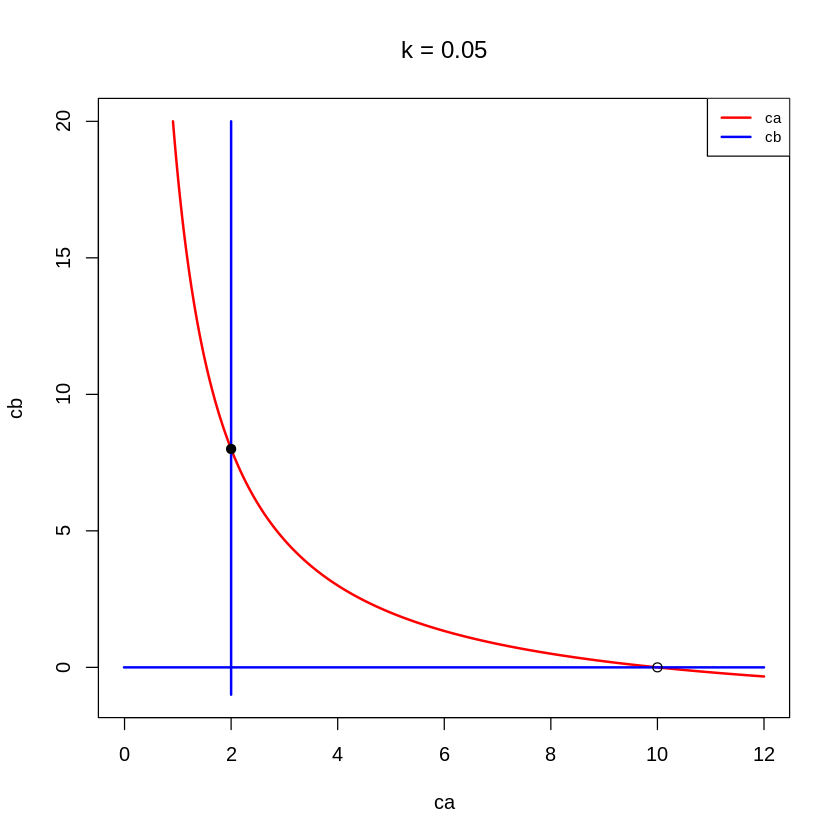

ca cb 
 1  9 
Stable point, eigenvalues:  -0.9 -0.1 
ca cb 
10  0 
Unstable point, eigenvalues:  0.9 -0.1 


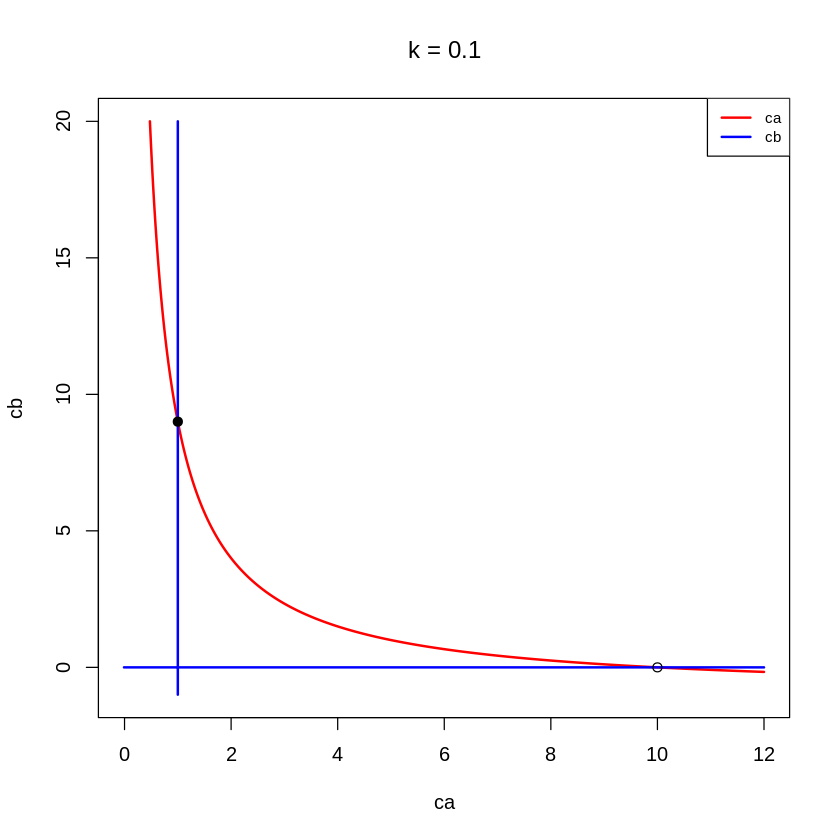

In [53]:
for(k in c(0.005, 0.01,0.05,0.1)) {

  p["k"] <- k
  plane(xmax = 12, ymax = 20, xmin = -0.01, ymin = -1, main = paste0("k = ", k))
  newton(state = c(ca = 1, cb = 10), plot = TRUE)
  newton(state = c(ca = 10, cb = 0), plot = TRUE)
}
p["k"] <- 0.1 # regresar al valor inicial 

## Diagrama de bifurcación 

### ¿Cómo depende el valor de $c_{Bss}$ del valor del parámetro $k$?

ca cb 
10  0 
Stable point, eigenvalues:  -0.1 -0.05 
Starting at k = 0.005 with:
ca cb 
10  0 
Bifurcation at k = 0.0101 
       ca        cb 
9.0909069 0.9090931 
Stable point, eigenvalues:  -0.1 -0.01000005 
Starting at k = 0.011 with:
       ca        cb 
9.0909069 0.9090931 


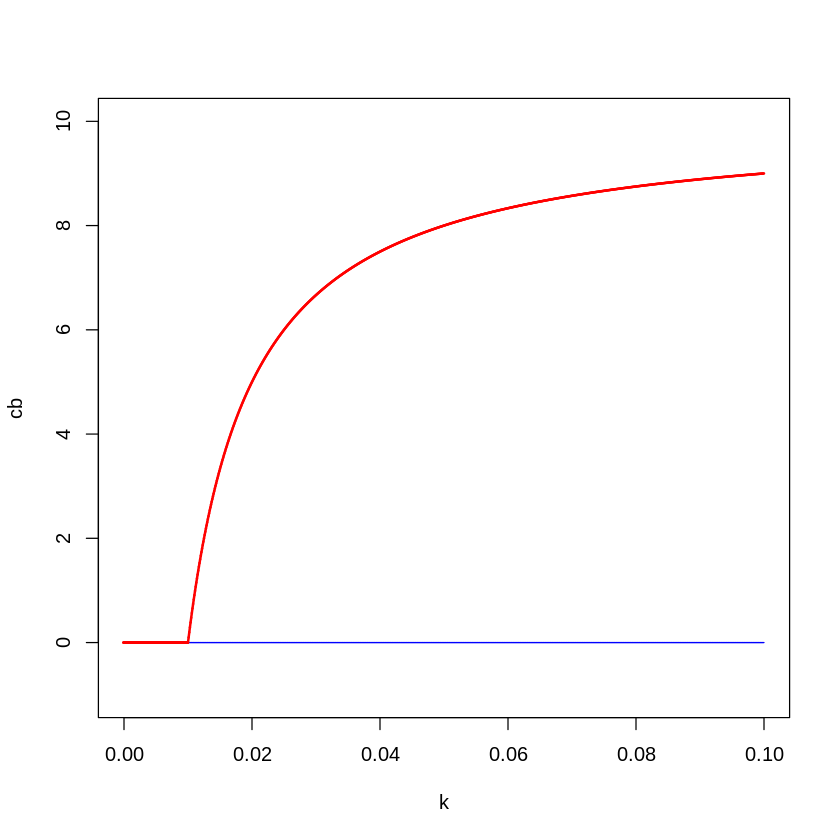

In [50]:
p["k"] <- 0.005
ss1 <- newton(state = c(ca = 10, cb = 0))
continue(state=ss1, parms=p, odes=model, x="k", step=0.001, xmin=0, xmax=0.1,y="cb", ymin=-1, ymax=10)
p["k"] <- 0.011
ss2 <- newton(state = c(ca = 1, cb = 10))
continue(state=ss2, parms=p, odes=model, x="k", step=0.001, xmin=0, xmax=0.1,y="cb", ymin=-1, ymax=10, add = T)
p["k"] <- 0.1 # regresar a su valor original 

### ¿Cómo depende el valor de $c_{Ass}$ del valor del parámetro $K$?

ca cb 
10  0 
Stable point, eigenvalues:  -0.1 -0.05 
Starting at k = 0.005 with:
ca cb 
10  0 
Bifurcation at k = 0.0101 
       ca        cb 
9.0909069 0.9090931 
Stable point, eigenvalues:  -0.1 -0.01000005 
Starting at k = 0.011 with:
       ca        cb 
9.0909069 0.9090931 


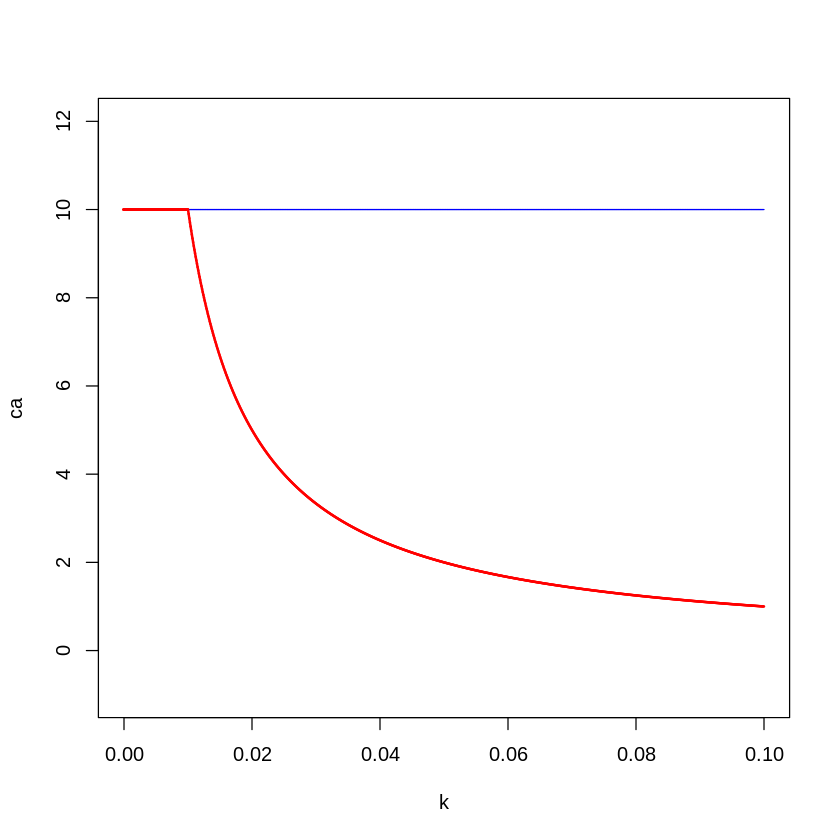

In [51]:
p["k"] <- 0.005
ss1 <- newton(state = c(ca = 10, cb = 0))
continue(state=ss1, parms=p, odes=model, x="k", step=0.001, xmin=0, xmax=0.1,y="ca", ymin=-1, ymax=12)
p["k"] <- 0.011
ss2 <- newton(state = c(ca = 1, cb = 10))
continue(state=ss2, parms=p, odes=model, x="k", step=0.001, xmin=0, xmax=0.1,y="ca", ymin=-1, ymax=12, add = T)
p["k"] <- 0.1 # regresar a su valor original 

En resumen el efecto del parámetro k sobre el equilibrio se tiene los siguiente.



1.   Cuando $\frac{D}{k} < c_{Ae}$, se tiene un solo punto de equilibrio $(c_{Ass} = c_{Ae}, c_{Bss} = 0)$. Esto se interpreta como que la velocidad a la que ocurre la reacción es insuficiente para mantener una concentración estable del reactivo $B$ en el reactor. 

2. Cuando $\frac{D}{k} > c_{Ae}$, se presenta una bifurcación, i.e., se pasa de tener un punto de equilibrio a tener dos. El punto de equilibrio $(c_{Ass} = c_{Ae}, c_{Bss} = 0)$ se vuelve inestable. Mientras que se obtiene un nuevo punto de equilibrio estable $(c_{Ass} = \frac{D}{k}, c_{Bss} = c_{Ae} - \frac{D}{k})$



# Optimización 

## Definir función objetivo 

Empezamos por establecer la función que nos permitirá conocer el rendimiento del proceso. 

$$f(D) = \frac{masa\ que\ se\ obtiene\ de\ B}{masa\ que\ se\ consume\ de\ A}$$ \

$$f(D) = \frac{m_{Bs}}{m_{Ae} - m_{As}}$$ \

$$f(D) = \frac{Dc_{B}V}{Dc_{Ae}V - Dc_{A}V}$$ \


$$f(D) = \frac{c_{B}}{c_{Ae} - c_{A}}$$

Si consideramos los puntos de equilibrio tenemos:

$$f(D) = \frac{c_{Bss}}{c_{Ae} - c_{Ass}}$$

$$f(D) = \frac{c_{Ae} - \frac{D}{k}}{c_{Ae} - \frac{D}{k}}$$

$$f(D) = 1 $$

El resultado anterior se obtiene debido a que el rendimiento no depende del parámetro $D$. Este está determinado por la razón de la cantidad de reactivo $A$ que se transforma en el reactivo $B$. De acuerdo con el modelo, el redimiento es de 100 %, ya que la misma cantidad de reactivo $A$ que se consume, $kc_{A}c_{B}$, se utiliza para la generación de $B$.